In [51]:
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Import File

In [108]:
def graph(file):
    df = import_file(file)
    plot(df,file)

def import_file(file):
    colnames = ["Wavelength (um)","Flux (Jy)","Statistical Error (Jy)"]
    df = pd.read_csv(file,sep='\s+',skiprows=19,names=colnames)
    return df

def plot(df,file):
    #plot
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
#    ax1.set_xlim(2.7,4)
    ax1.set_ylim(-1,10)
    
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Flux (Jy)",fontsize=16)
    ax1.set_title(file,fontsize=18)
    

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

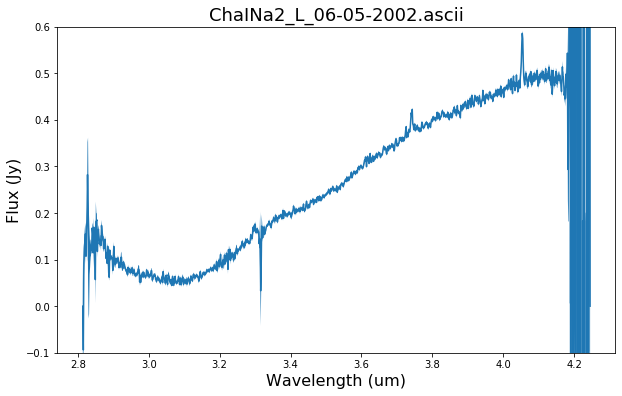

In [57]:
file = "ChaINa2_L_06-05-2002.ascii"
df = import_file(file)
#plot(df,file)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
ax1.fill_between(df["Wavelength (um)"], 
                 df["Flux (Jy)"]+df["Statistical Error (Jy)"],
                 df["Flux (Jy)"]-df["Statistical Error (Jy)"]) #error bars
    
#ax1.set_xlim(2.7,4)
ax1.set_ylim(-0.1,0.6)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

(-0.2, 0.6)

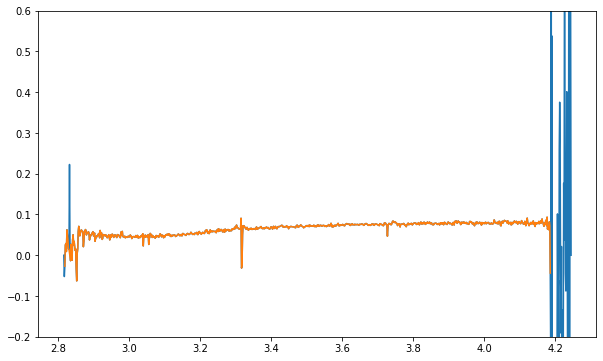

In [134]:
# exclude outliers from the data

df2 = df[df["Statistical Error (Jy)"]<0.1]

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
ax1.plot(df2["Wavelength (um)"],df2["Flux (Jy)"])
ax1.set_ylim(-0.2,0.6)

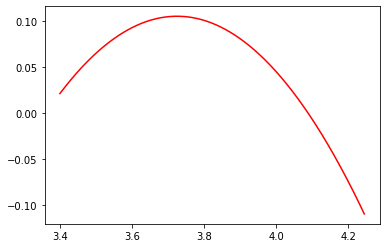

In [113]:
df1 = df[df["Wavelength (um)"]>3.4]
df1 = df1[df1["Wavelength (um)"]<4.4]

# attempt to fit a curve to the graph
x_val,y_val,err = df1["Wavelength (um)"],df1["Flux (Jy)"],df1["Statistical Error (Jy)"]
def func(x, a, b, c):
#    return a * np.exp(-b * x) + c  #exponential fit
    return a*x**2 + b*x + c #polynomial fit
popt, _ = curve_fit(func, x_val, y_val)
a,b,c = popt

#plt.plot(x_val,y_val)
plt.plot(x_val, func(x_val, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [111]:
max_val = max(func(x_val,*popt))

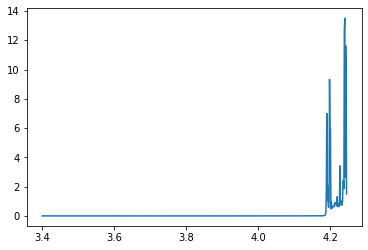

In [114]:
plt.plot(x_val,err)

In [120]:
df2

,Wavelength (um),Flux (Jy),Statistical Error (Jy)
2,2.81983,-0.026909,0.051324
3,2.82129,0.025206,0.030340
4,2.82274,0.028766,0.026017
5,2.82420,0.009222,0.026330
6,2.82566,0.062360,0.017944
...,...,...,...
972,4.18136,0.070383,0.015628
973,4.18264,0.062392,0.020778
974,4.18391,0.082051,0.029785
975,4.18519,0.073222,0.046828


In [112]:
df

,Wavelength (um),Flux (Jy),Statistical Error (Jy)
0,2.81691,0.000000,0.263416
1,2.81837,-0.052282,0.166427
2,2.81983,-0.026909,0.051324
3,2.82129,0.025206,0.030340
4,2.82274,0.028766,0.026017
...,...,...,...
1019,4.24017,-1.823700,13.507100
1020,4.24139,-0.836964,2.624780
1021,4.24261,3.375040,11.635100
1022,4.24383,0.588550,9.882320


In [104]:
file_names = ["ChaINa2_L_06-05-2002.ascii",
              "ChaIRN_1301_jan_L.ascii",
              "ChaIRN_jan_L.ascii",
              "CRBR2422_L_02-05-2002.ascii",
              "EC82_L_07-05-2002.ascii",
              "EC90A_L_07-05-2002.ascii",
              "EC90B_L_07-05-2002.ascii",
              "Elias32_L_02-05-2002.ascii",
              "GL961E_jan_L.ascii",
              "GL961W_jan_L.ascii",
              "GL989_jan_L.ascii",
              "GSS30IRS1_L_12-09-2001.ascii",
              "HH100_L.ascii",
              "HH46_L.ascii",
              "HH46_L_TOTAL.ascii",
              "HH54_L.ascii",
              "IRAS08211_jan_L.ascii",
              "IRAS08261_jan_L.ascii",
              "IRAS08375_L.ascii",
              "IRAS08375A_1301_jan_L.ascii",
              "IRAS08375B_1301_jan_L.ascii",
              "IRAS08448_jan_L.ascii",
              "IRAS08470_jan_L.ascii",
              "IRAS09017_jan_L.ascii",
              "IRAS11068_jan_L.ascii",
              "IRS42_L_13-08-2001.ascii",
              "IRS43_L_02-05-2002.ascii",
              "IRS44_L_02-05-2002.ascii",
              "IRS46_L_02-05-2002.ascii",
              "IRS48_L_05-05-2002.ascii",
              "IRS51_L_03-09-2001.ascii",
              "IRS54_L_05-05-2002.ascii",
              "IRS63_L_21-08-2001.ascii",
              "L1489_jan_L.ascii",
              "L1489_L_23-08-2002.ascii",
              "LLN20_L_15-11-2001.ascii",
              "LLN33_L_13-11-2001.ascii",
              "LLN47_L_11-11-2001.ascii",
              "LMCP2_L_15-11-2001.ascii",
              "NGC3576A_L_06-05-2002.ascii",
              "NGC3576B_L_06-05-2002.ascii",
              "RCRAIRA5A_L_07-05-2002.ascii",
              "RCRAIRA5B_L_07-05-2002.ascii",
              "RCRAIRS7A_L_04-07-2002.ascii",
              "RCRAIRS7B_L_04-07-2002.ascii",
              "Reipurth50_L.ascii",
              "SVS4-10_L.ascii",
              "SVS4-12_L.ascii",
              "SVS4-2_L.ascii",
              "SVS4-3_L.ascii",
              "SVS4-4_L.ascii",
              "SVS4-5_L_07-05-2002.ascii",
              "SVS4-6_L.ascii",
              "SVS4-7_L.ascii",
              "SVS4-8_L.ascii",
              "SVS4-9_L_07-05-2002.ascii",
              "T42_L.ascii",
              "TPSC1_L_13-11-2001.ascii",
              "TPSC78_L_13-11-2001.ascii",
              "VSSG17_L_02-05-2002.ascii",
              "VSSG1_L_07-05-2001.ascii",
              "VVSer_set1_L.ascii",
              "W33A_L_04-08-2001.ascii",
              "WL12_L_07-05-2002.ascii",
              "WL16_L_07-05-2002.ascii",
              "WL20_L_02-05-2002.ascii",
              "WL20E_L_02-05-2002.ascii"]

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

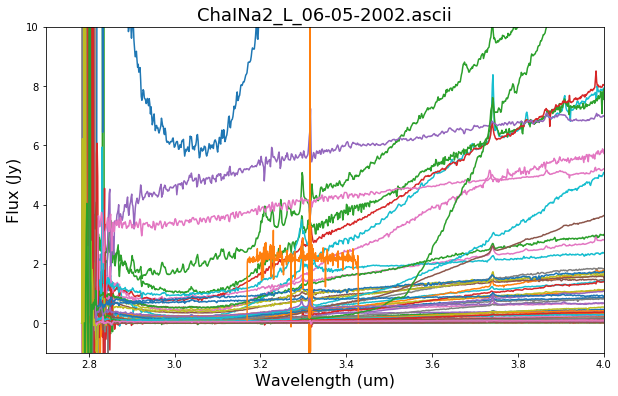

In [105]:
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
for name in file_names:
    df = import_file(name)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
ax1.set_xlim(2.7,4)
ax1.set_ylim(-1,10)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

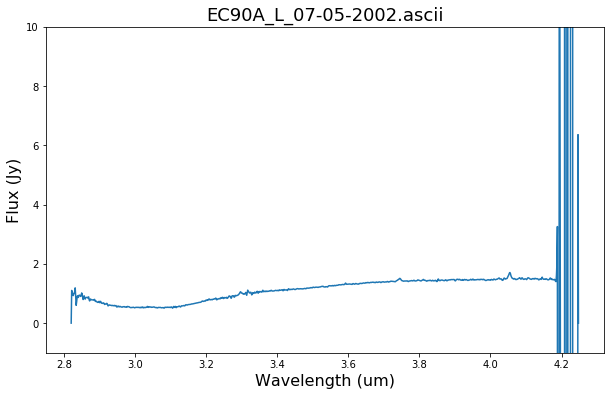

In [110]:
graph(file_names[5])

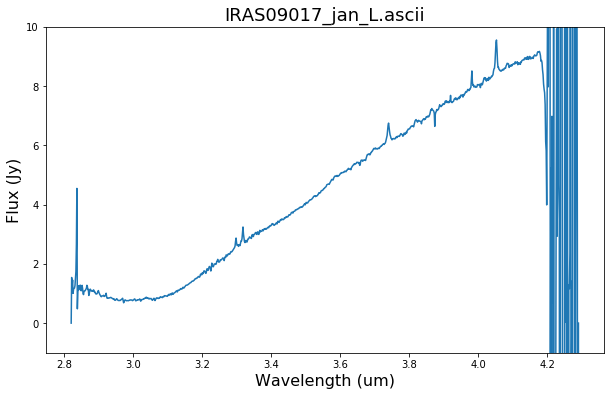

In [109]:
graph(file_names[23])